In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
import seaborn as sns
import time
import json

from game import *
from utils import *
from plots import *
from agents import *
from T4T import *

palette = sns.color_palette("colorblind")
sns.set_palette(palette)
sns.set(context='paper', style='white', font='CMU Serif', rc={'font.size':12, 'mathtext.fontset': 'cm'})

In [25]:
def run(agents, nGames, opponent, verbose=False):
    dfs = []
    for a, agent in enumerate(agents):
        if verbose: print(f"{agent.ID}")
        if opponent=='greedy':
            t4ts = make_greedy_trustees(nGames, seed=a)
        elif opponent=='generous':
            t4ts = make_generous_trustees(nGames, seed=a)
        for g in range(nGames):
            if verbose: print(f"game {g}")
            df = play_game(agent, t4ts[g], gameID=g, train=True)
            dfs.extend(df)
        del(agent)
    data = pd.concat(dfs, ignore_index=True)
    return data

# DQN

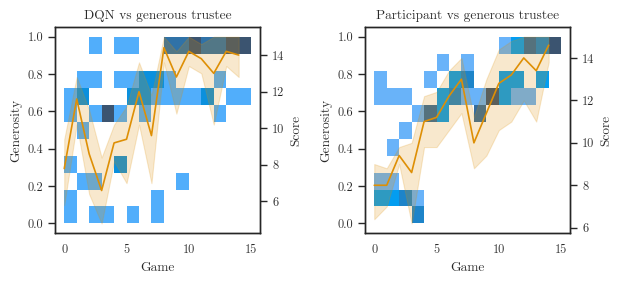

In [61]:
nAgents = 1
nGames = 15
pid = 'sree'

seed=477
nNeurons=67
tau=2
alpha=0.55
gamma=0.53
w_o=0.93
w_i=0.01

emp = pd.read_pickle("data/human_data_cleaned.pkl").query("ID==@pid & player=='investor'")
opponent = emp['opponent'].unique()[0]

agents = []
for n in range(nAgents):
    agents.append(
        DQN(
        'investor',
        ID=f"DQN{n}",
        seed=seed if nAgents==1 else n,
        nNeurons=nNeurons,
        tau=tau,
        alpha=alpha,
        gamma=gamma,
        explore='exponential',
        update='SARSA',
        w_s=1.0,
        w_o=w_o,
        w_i=w_i,
        nGames=nGames)
    )

agentIDs = [agent.ID for agent in agents]
sim = run(agents, nGames=nGames, opponent=opponent).query("ID in @agentIDs")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.histplot(data=sim, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[0], color=palette[0])
ax2 = axes[0].twinx()
sns.lineplot(data=sim, x='game', y='coins', ax=ax2, color=palette[1])
axes[0].set(title=f'DQN vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score')
sns.histplot(data=emp, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[1], color=palette[0])
ax3 = axes[1].twinx()
sns.lineplot(data=emp, x='game', y='coins', ax=ax3, color=palette[1])
axes[1].set(title=f'Participant vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax3.set(ylabel='Score')

plt.tight_layout()

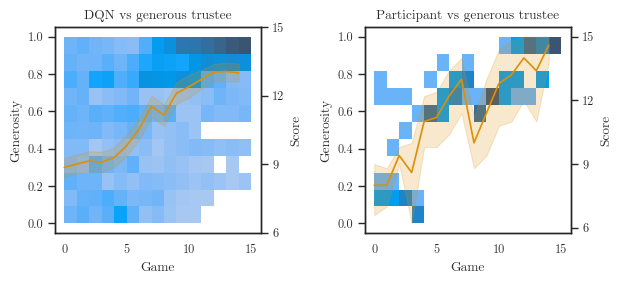

In [111]:
nAgents = 30
nGames = 15
pid = 'sree'

nNeurons=57
tau=5.2
alpha=0.06
gamma=0.05
w_o=0.62
w_i=0.13

emp = pd.read_pickle("data/human_data_cleaned.pkl").query("ID==@pid & player=='investor'")
opponent = emp['opponent'].unique()[0]

agents = []
for n in range(nAgents):
    agents.append(
        DQN(
        'investor',
        ID=f"DQN{n}",
        seed=seed if nAgents==1 else n,
        nNeurons=nNeurons,
        tau=tau,
        alpha=alpha,
        gamma=gamma,
        explore='exponential',
        update='SARSA',
        w_s=1.0,
        w_o=w_o,
        w_i=w_i,
        nGames=nGames)
    )

agentIDs = [agent.ID for agent in agents]
sim = run(agents, nGames=nGames, opponent=opponent).query("ID in @agentIDs")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.histplot(data=sim, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[0], color=palette[0])
ax2 = axes[0].twinx()
sns.lineplot(data=sim, x='game', y='coins', ax=ax2, color=palette[1])
axes[0].set(title=f'DQN vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score', yticks=((6,9,12,15)))
sns.histplot(data=emp, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[1], color=palette[0])
ax3 = axes[1].twinx()
sns.lineplot(data=emp, x='game', y='coins', ax=ax3, color=palette[1])
axes[1].set(title=f'Participant vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax3.set(ylabel='Score', yticks=((6,9,12,15)))

plt.tight_layout()

# IBL

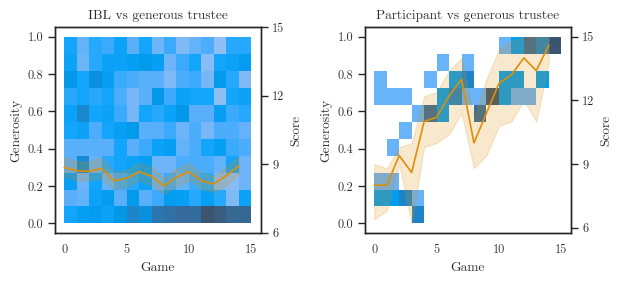

In [114]:
nAgents = 30
nGames = 15
pid = 'sree'

thrA=0.78
tau=1
alpha=0.25
gamma=0.98
w_o=0.02
w_i=0.62

emp = pd.read_pickle("data/human_data_cleaned.pkl").query("ID==@pid & player=='investor'")
opponent = emp['opponent'].unique()[0]

agents = []
for n in range(nAgents):
    agents.append(
        IBL(
        'investor',
        ID=f"IBL{n}",
        seed=seed if nAgents==1 else n,
        thrA=thrA,
        tau=tau,
        gamma=gamma,
        explore='exponential',
        update='SARSA',
        w_s=1.0,
        w_o=w_o,
        w_i=w_i,
        nGames=nGames)
    )

agentIDs = [agent.ID for agent in agents]
sim = run(agents, nGames=nGames, opponent=opponent).query("ID in @agentIDs")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.histplot(data=sim, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[0], color=palette[0])
ax2 = axes[0].twinx()
sns.lineplot(data=sim, x='game', y='coins', ax=ax2, color=palette[1])
axes[0].set(title=f'IBL vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score', yticks=((6,9,12,15)))
sns.histplot(data=emp, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[1], color=palette[0])
ax3 = axes[1].twinx()
sns.lineplot(data=emp, x='game', y='coins', ax=ax3, color=palette[1])
axes[1].set(title=f'Participant vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax3.set(ylabel='Score', yticks=((6,9,12,15)))

plt.tight_layout()

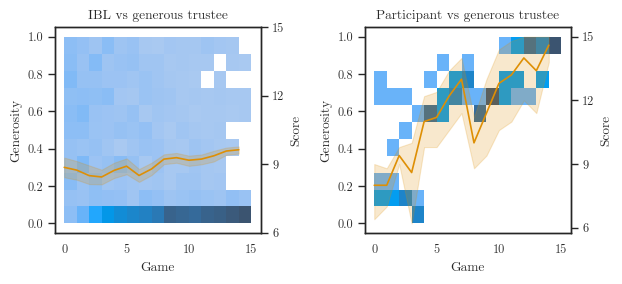

In [116]:
nAgents = 30
nGames = 15
pid = 'sree'

thrA=0.0
tau=3
gamma=0.98
w_o=0.9
w_i=0.62

emp = pd.read_pickle("data/human_data_cleaned.pkl").query("ID==@pid & player=='investor'")
opponent = emp['opponent'].unique()[0]

agents = []
for n in range(nAgents):
    agents.append(
        IBL(
        'investor',
        ID=f"IBL{n}",
        seed=seed if nAgents==1 else n,
        thrA=thrA,
        tau=tau,
        gamma=gamma,
        explore='exponential',
        update='SARSA',
        w_s=1.0,
        w_o=w_o,
        w_i=w_i,
        nGames=nGames)
    )

agentIDs = [agent.ID for agent in agents]
sim = run(agents, nGames=nGames, opponent=opponent).query("ID in @agentIDs")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.histplot(data=sim, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[0], color=palette[0])
ax2 = axes[0].twinx()
sns.lineplot(data=sim, x='game', y='coins', ax=ax2, color=palette[1])
axes[0].set(title=f'IBL vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score', yticks=((6,9,12,15)))
sns.histplot(data=emp, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[1], color=palette[0])
ax3 = axes[1].twinx()
sns.lineplot(data=emp, x='game', y='coins', ax=ax3, color=palette[1])
axes[1].set(title=f'Participant vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax3.set(ylabel='Score', yticks=((6,9,12,15)))

plt.tight_layout()

# load GPU runs

In [112]:
f = open('data/gpu3')
result = json.load(f)
min_loss = 1000
params = {}
for trial in result:
    loss = float(trial['value'])
    if loss <= min_loss:
        min_loss = loss
        params = trial['parameter']
print(params, min_loss)

{'thrA': 0.78, 'tau': 1, 'alpha': 0.25, 'gamma': 0.98, 'w_o': 0.02, 'w_i': 0.62} 1.1256577655555557


(array([  3.,   0.,   1.,   3.,   2.,   7.,   9.,  15.,  17.,  21.,  30.,
         42.,  57.,  84., 120., 184., 231., 322., 424., 518., 699., 802.,
        937., 952., 902., 764., 665., 542., 441., 344., 265., 183., 126.,
         90.,  65.,  45.,  26.,  20.,   8.,   7.,   7.,   7.,   1.,   2.,
          0.,   3.,   3.,   1.,   0.,   3.]),
 array([-8.67435556e-06, -8.30673546e-06, -7.93911536e-06, -7.57149525e-06,
        -7.20387515e-06, -6.83625505e-06, -6.46863494e-06, -6.10101484e-06,
        -5.73339474e-06, -5.36577463e-06, -4.99815453e-06, -4.63053443e-06,
        -4.26291433e-06, -3.89529422e-06, -3.52767412e-06, -3.16005402e-06,
        -2.79243391e-06, -2.42481381e-06, -2.05719371e-06, -1.68957360e-06,
        -1.32195350e-06, -9.54333396e-07, -5.86713293e-07, -2.19093189e-07,
         1.48526914e-07,  5.16147017e-07,  8.83767120e-07,  1.25138722e-06,
         1.61900733e-06,  1.98662743e-06,  2.35424753e-06,  2.72186764e-06,
         3.08948774e-06,  3.45710784e-06,  3.82472

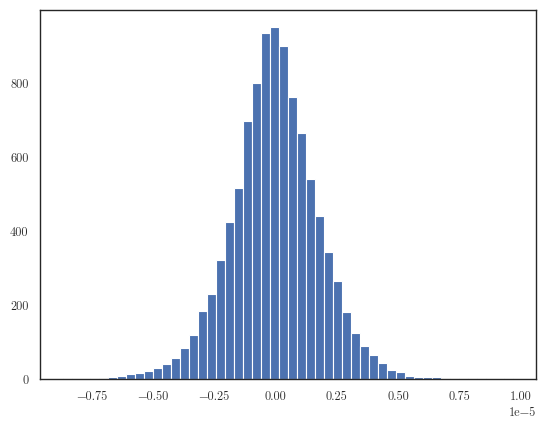

In [119]:
loc, scale = 0, 1e-6
s = np.random.logistic(loc, scale, 10000)
plt.hist(s, bins=50)